# Salman Bader Alhaddad

# __Blackbox Model Lab: Loan Approval__

## __Information__

In this lab, you will apply ensemble learning techniques to predict loan approval outcomes using a structured dataset. The dataset includes demographic, financial, and credit history features, with the target variable `loan_status` indicating whether a loan was approved (1) or rejected (0). Your task is to explore the data through EDA, clean and preprocess it as needed, and build predictive models using **two** of the following methods: **Bagging**, **Random Forest**, or **Boosting**.

You are expected to document your workflow using markdown, including insights from your EDA, preprocessing decisions, and modeling rationale. After training both models, evaluate their performance using relevant metrics such as accuracy, precision, recall, F1-score, and confusion matrix. Conclude with a comparative analysis of the two models, discussing which performed better and why. This lab emphasizes not only technical execution but also clear communication of your process and findings.


## __Data Dictionary__
| Column                          | Description                                             | Type        |
|----------------------------------|---------------------------------------------------------|-------------|
| person_age                       | Age of the person                                       | Float       |
| person_gender                    | Gender of the person                                    | Categorical |
| person_education                 | Highest education level                                 | Categorical |
| person_income                   | Annual income                                           | Float       |
| person_emp_exp                   | Years of employment experience                          | Integer     |
| person_home_ownership            | Home ownership status (e.g., rent, own, mortgage)       | Categorical |
| loan_amnt                        | Loan amount requested                                   | Float       |
| loan_intent                      | Purpose of the loan                                     | Categorical |
| loan_int_rate                    | Loan interest rate                                      | Float       |
| loan_percent_income              | Loan amount as a percentage of annual income            | Float       |
| cb_person_cred_hist_length       | Length of credit history in years                       | Float       |
| credit_score                     | Credit score of the person                              | Integer     |
| previous_loan_defaults_on_file  | Indicator of previous loan defaults                     | Categorical |
| loan_status (target variable)    | Loan approval status: 1 = approved; 0 = rejected        | Integer     |



## Let's Get Started !!!

In [6]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Upload Data
loan_data = pd.read_csv('loan_data.csv')

# Understand the data

In [12]:
loan_data.shape

(45000, 14)

In [7]:
loan_data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
loan_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [13]:
# check null values
loan_data.isnull().sum()


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [15]:
# check the data imbalanced or not
loan_data['loan_status'].value_counts(normalize=True)

loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

<Axes: xlabel='loan_status', ylabel='count'>

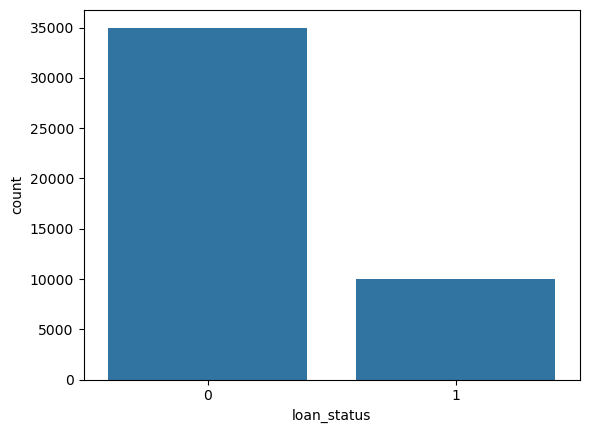

In [17]:
import seaborn as sns
sns.countplot(x='loan_status', data=loan_data)

<Axes: xlabel='loan_status', ylabel='person_income'>

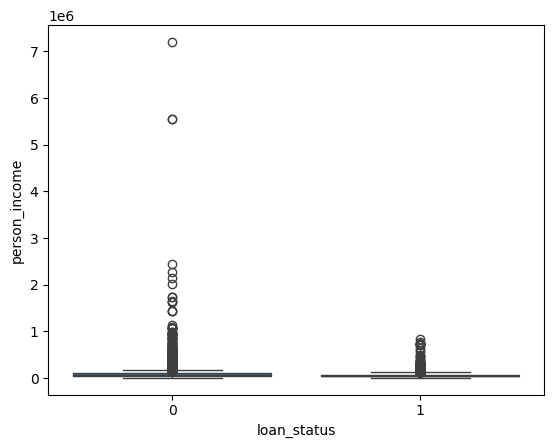

In [19]:
sns.boxplot(x='loan_status', y='person_income', data=loan_data)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

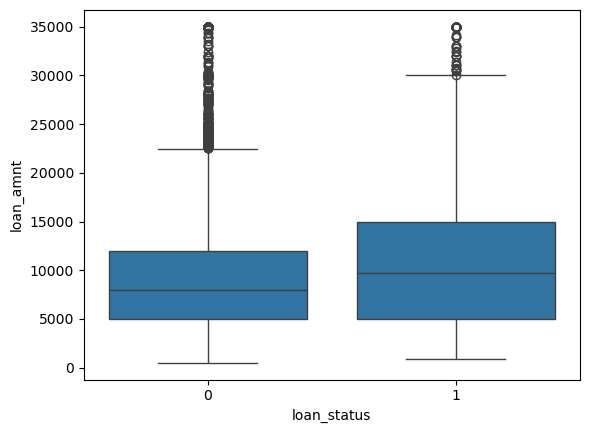

In [20]:
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data)


<Axes: xlabel='loan_amnt'>

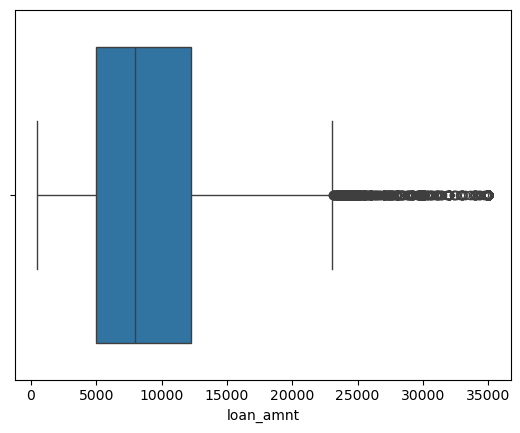

In [26]:
# Outlier detection
sns.boxplot(x=loan_data['loan_amnt'])

# Bagging Model

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
# Prepare Data
# Make a copy
df = loan_data.copy()

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']


In [36]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [41]:
# Build Bagging model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)



In [44]:
# Train model
bag_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [45]:
# Evaluate the model
# Predictions
y_pred = bag_model.predict(X_test)

# Accuracy
print("Training Accuracy:", bag_model.score(X_train, y_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

# Detailed evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9256666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.87      0.78      0.82      2010

    accuracy                           0.93      9000
   macro avg       0.90      0.88      0.89      9000
weighted avg       0.92      0.93      0.92      9000


Confusion Matrix:
 [[6755  235]
 [ 434 1576]]


# Building Random Forest model

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
rf_model = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=None,          # allow trees to grow fully
    random_state=42,
    n_jobs=-1,               # use all CPU cores for speed
    oob_score=True           # optional: compute out-of-bag score
)


In [48]:
# rain the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [49]:
# Evaluate the model
# Predictions
y_pred = rf_model.predict(X_test)

# Accuracy
print("Training Accuracy:", rf_model.score(X_train, y_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("OOB Accuracy:", rf_model.oob_score_)  # optional

# More details
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Training Accuracy: 1.0
Testing Accuracy: 0.9286666666666666
OOB Accuracy: 0.9244444444444444

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000


Confusion Matrix:
 [[6797  193]
 [ 449 1561]]


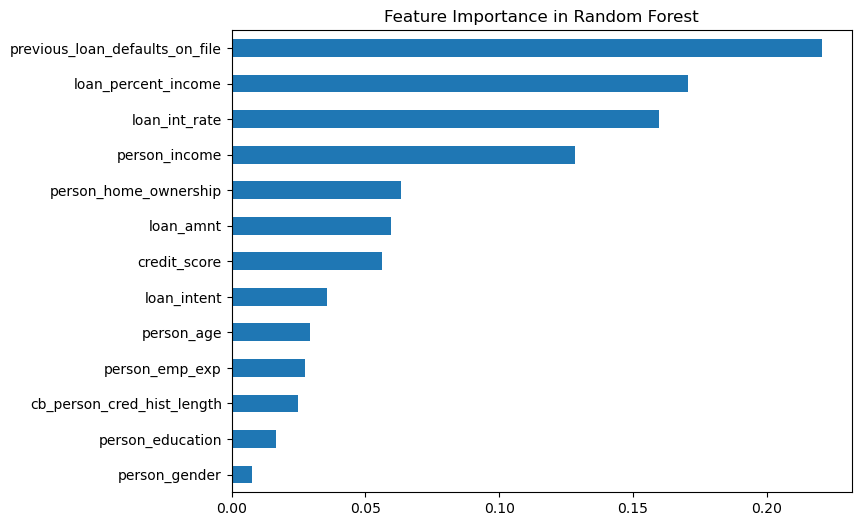

In [50]:
# Check feature importance 
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance in Random Forest")
plt.show()
